# IMDB Data Visualization

# 1 Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import re,string,unicodedata

import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



In [2]:
# Need to download the following to use stopwords in nltk

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daisuke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df["sentiment"][0]

'positive'

In [5]:
# 処理前

df["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

## Data Cleaning

In [6]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)



# BeautifulSoup(解析対象のHTML/XML, 利用するパーサー)


def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()



#　記号を取り除く

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)



# URLを取り除く

def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)




#　ストップワードで処理

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)






#　まとめる

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text



In [7]:
# 処理開始！

df['review']=df['review'].apply(denoise_text)

In [8]:
# いい感じ！

df.sentiment.replace("positive" , 1 , inplace = True)
df.sentiment.replace("negative" , 0 , inplace = True)
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ex...,1
1,wonderful little filming technique fashion giv...,1
2,thought wonderful way spend time hot summer si...,1
3,basically family little boy thinks zombie clos...,0
4,petter time visually stunning film mattei offe...,1


In [9]:
df[df.sentiment == 1].review

0        one reviewers mentioned watching oz episode ex...
1        wonderful little filming technique fashion giv...
2        thought wonderful way spend time hot summer si...
4        petter time visually stunning film mattei offe...
5        probably favorite story sacrifice dedication n...
                               ...                        
49983    loved fan original always wondered back story ...
49985    imaginary heroes clearly best film complete ut...
49989    got one weeks ago love light filled true compl...
49992    john garfield plays marine blinded grenade fig...
49995    thought movie right good creative original exp...
Name: review, Length: 25000, dtype: object

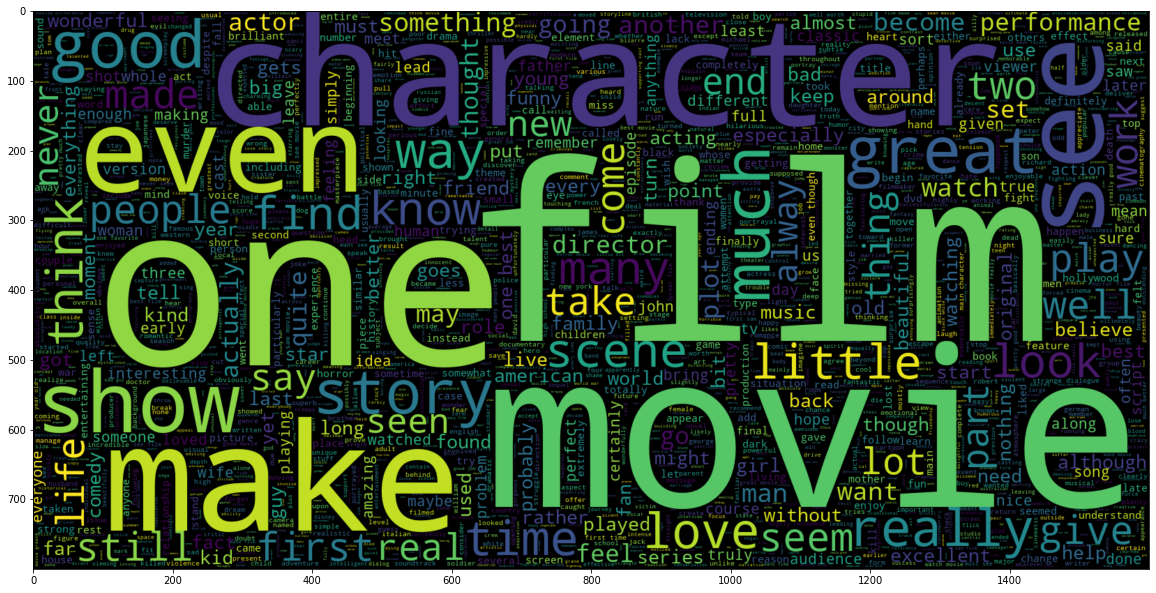

In [10]:
plt.figure(figsize = (20,20)) # Positive Review Text

wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].review))
plt.imshow(wc , interpolation = 'bilinear')

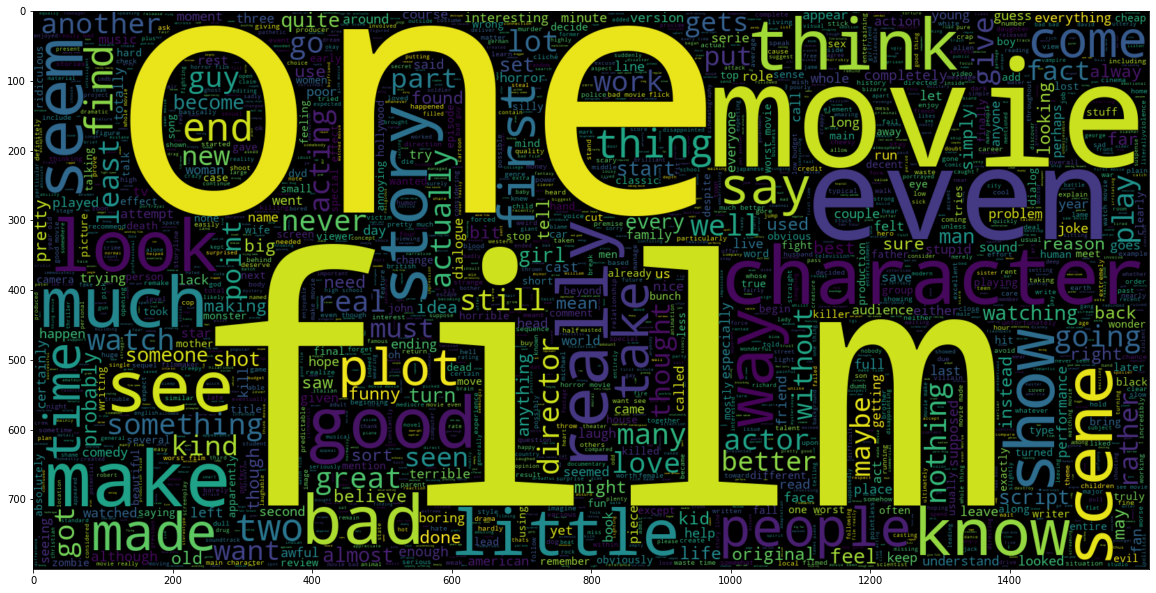

In [11]:
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].review))
plt.imshow(wc , interpolation = 'bilinear')


# oneとかfilmの単語は後で除いた方が見やすいかな？